<a href="https://colab.research.google.com/github/Pillalamarrivyshnavi/Ml-Models/blob/main/All_classifiers_Malaria_outbreak_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/outbreak_detect.csv")

In [ ]:
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maxTemp      24 non-null     float64
 1   minTemp      25 non-null     float64
 2   avgHumidity  26 non-null     float64
 3   Rainfall     26 non-null     float64
 4   Positive     26 non-null     int64  
 5   pf           26 non-null     int64  
 6   Outbreak     25 non-null     object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.5+ KB


In [ ]:
df.shape

(26, 7)

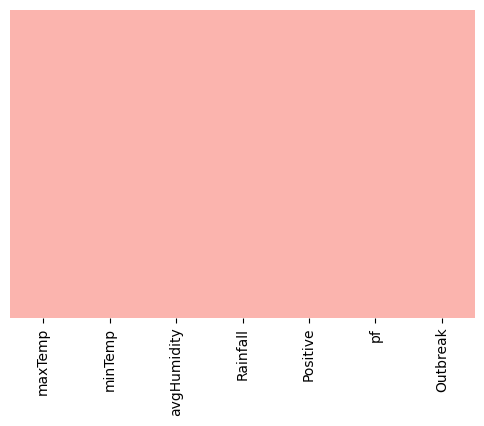

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')
  return plt.show()#gist_rainbow
get_heatmap(df)

In [ ]:
df

In [ ]:
df.isnull().sum()

maxTemp        2
minTemp        1
avgHumidity    0
Rainfall       0
Positive       0
pf             0
Outbreak       1
dtype: int64

In [ ]:
import math

In [ ]:
median_maxTemp=df['maxTemp'].median()
print(math.floor(median_maxTemp))

33


In [ ]:
median_minTemp=df['minTemp'].median()
print(math.floor(median_minTemp))

24


In [ ]:
df['maxTemp']=df['maxTemp'].fillna(median_maxTemp)
df['minTemp']=df['minTemp'].fillna(median_minTemp)

In [ ]:
df 

In [ ]:
df.isnull().sum()

maxTemp        0
minTemp        0
avgHumidity    0
Rainfall       0
Outbreak       0
dtype: int64

In [ ]:
from sklearn import preprocessing

#label encoding
LE=preprocessing.LabelEncoder()

#fitting the technique to dataset
df.Outbreak=LE.fit_transform(df.Outbreak) #converting variables to numeric values
df.head(26)

In [ ]:
median_Outbreak=df['Outbreak'].median()
print(median_Outbreak)

0.0


In [ ]:
df=df.drop(25,axis=0)

In [ ]:
df['Outbreak']=df['Outbreak'].replace(2,0)
print(df)

In [ ]:
df=df.drop(['Positive',   'pf'],axis =1)


In [ ]:
df

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
0,29.0,18.0,49.74,0.00,0
1,34.0,23.0,83.27,15.22,1
2,40.0,23.0,50.74,0.00,0
3,33.5,24.0,84.57,11.15,0
4,34.0,24.0,59.16,9.06,0
5,34.0,27.0,73.23,0.00,1
6,31.0,24.0,88.77,41.40,1
7,33.0,24.0,77.94,23.88,1
8,31.0,24.0,84.57,11.15,0
9,36.0,24.0,53.40,2.12,0


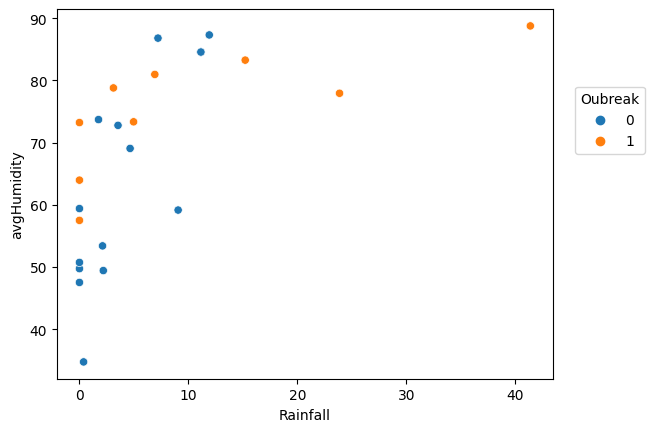

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x="Rainfall",
                 y="avgHumidity",
                 hue="Outbreak",legend='brief',
                 data=df)
plt.legend(loc='center right', title='Oubreak',bbox_to_anchor=(1.20,0.70))

In [ ]:
X=df.iloc[:,:-1].values #iloc==>index location 2D array #independent variables x(all col except outbreak)
Y=df.iloc[:,-1:].values #2D array

In [ ]:
X

In [ ]:
Y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train

In [ ]:
#Normalizing the data-Standard Scalar
from sklearn.preprocessing  import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train) #fit transform is used to scale the values to one range(transform all the data into one range)
X_test=sst.transform(X_test)#transform the data that is already fitted previous

In [ ]:
X_train

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=model.predict( X_test)

In [ ]:
print("Training Accuracy",model.score(X_train,Y_train))
print("Testing accuracy",model.score(X_test,Y_test))
print("Overall Accuracy",model.score(sst.transform(X),Y))

Training Accuracy 0.65
Testing accuracy 0.6
Overall Accuracy 0.64


In [ ]:
model.score(sst.transform(X),Y) 

0.64

In [ ]:
model.score(X_train,Y_train)

0.65

In [ ]:
model.score(X_test,Y_test)

0.6

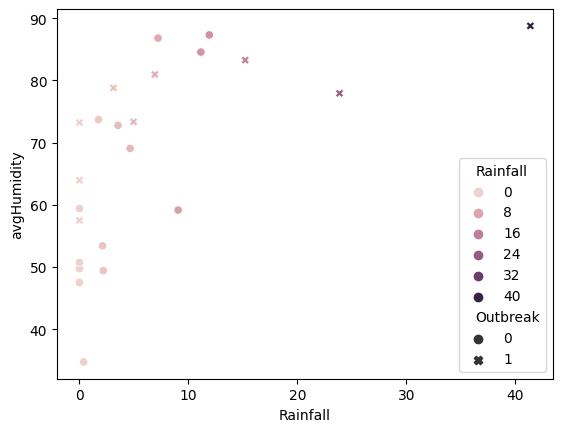

In [ ]:
sns.scatterplot(data=df, x="Rainfall", y="avgHumidity",hue="Rainfall",style="Outbreak")
plt.show()

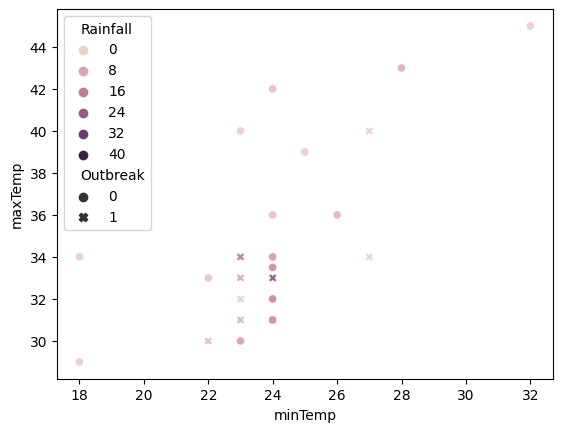

In [ ]:
sns.scatterplot(data=df, x="minTemp", y="maxTemp",hue="Rainfall",style="Outbreak")
plt.show()

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import  GaussianNB
nb=GaussianNB()

In [ ]:
nb.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
print("Training Accuracy",nb.score(X_train,Y_train))
print("Testing accuracy",nb.score(X_test,Y_test))
print("Overall Accuracy",nb.score(sst.transform(X),Y))

Training Accuracy 0.65
Testing accuracy 0.6
Overall Accuracy 0.64


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4) #decide k value 
knn.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
print("Training Accuracy",knn.score(X_train,Y_train))
print("Testing Accuracy",knn.score(X_test,Y_test))
print("Overall Accuracy:",knn.score(sst.transform(X),Y))

Training Accuracy 0.6
Testing Accuracy 0.8
Overall Accuracy: 0.64


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

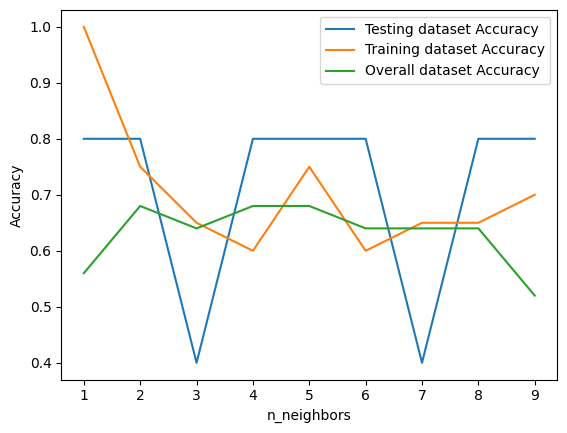

In [ ]:
import matplotlib.pyplot as plt
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))  #creating empty array
test_accuracy = np.empty(len(neighbors))
overall_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)

    #overall accuracy
    overall_accuracy[i] = knn.score(X,Y)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.plot(neighbors, overall_accuracy, label = 'Overall dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,Y_train)


DecisionTreeClassifier()

In [ ]:
print("Training Accuracy",dt.score(X_train,Y_train))
print("Testing accuracy",dt.score(X_test,Y_test))
print("Overall Accuracy",dt.score(sst.transform(X),Y))

Training Accuracy 1.0
Testing accuracy 0.6
Overall Accuracy 0.92


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,Y_train)

<ipython-input-132-70917fd5b97b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier()

In [ ]:
print("Training Accuracy",rf.score(X_train,Y_train))
print("Testing accuracy",rf.score(X_test,Y_test))
print("Overall Accuracy",rf.score(sst.transform(X),Y))

Training Accuracy 1.0
Testing accuracy 0.8
Overall Accuracy 0.96


**Evaluation Metric-Accuracy Score**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(Y,model.predict(sst.transform(X)))
accuracy_nb = accuracy_score(Y,nb.predict(sst.transform(X)))
accuracy_knn = accuracy_score(Y,knn.predict(sst.transform(X)))
accuracy_dt = accuracy_score(Y,dt.predict(sst.transform(X)))
accuracy_rf = accuracy_score(Y,rf.predict(sst.transform(X)))

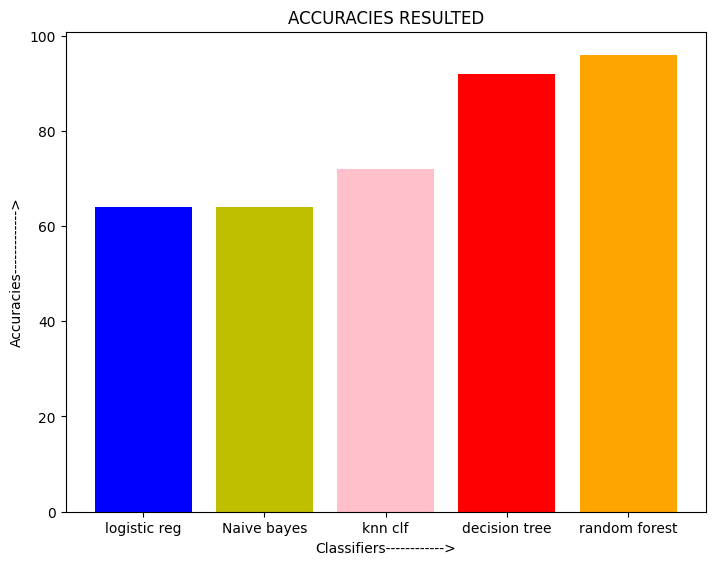

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

algo = ['logistic reg','Naive bayes','knn clf','decision tree','random forest']

accuracy = [accuracy_lr*100,accuracy_nb*100,accuracy_knn*100,accuracy_dt*100,accuracy_rf*100]

ax.bar(algo[0],accuracy[0],color = 'b')

ax.bar(algo[1],accuracy[1],color = 'y')

ax.bar(algo[2],accuracy[2],color = 'pink')

ax.bar(algo[3],accuracy[3],color = 'r')

ax.bar(algo[4],accuracy[4],color = 'orange')

plt.xlabel('Classifiers------------>')

plt.ylabel('Accuracies------------->')

plt.title('ACCURACIES RESULTED')

plt.show()